In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
print (matplotlib.__version__)

3.6.1


In [2]:
met_df = pd.read_csv("2_17_23_Core_I3_ConfMat_MET-type Label_reorg.csv", index_col = [0])
# Core_I3_ConfMat_MET-type Label
met_df.columns = met_df.columns.str.split(' ').str[0]
met_df.index  = met_df.index.str.split(' ').str[0]
met_df.columns = met_df.columns.str.replace('-MET-', '-')
met_df.index  = met_df.index.str.replace('-MET-', '-')

print (met_df.head())
diaglabel  = pd.Series(np.diag(met_df), index=[met_df.index, met_df.columns])
print (diaglabel)

          Lamp5-1   Pvalb-1   Pvalb-2   Pvalb-3   Pvalb-4    Sncg-1     Sst-1  \
Lamp5-1  0.855814  0.000000  0.015116  0.000000  0.034884  0.010465  0.000000   
Pvalb-1  0.000000  0.371429  0.300000  0.000000  0.000000  0.000000  0.000000   
Pvalb-2  0.001563  0.026562  0.890625  0.000000  0.000000  0.014063  0.003125   
Pvalb-3  0.000000  0.005000  0.000000  0.800000  0.000000  0.000000  0.000000   
Pvalb-4  0.075610  0.000000  0.024390  0.067073  0.471951  0.050000  0.000000   

            Sst-2    Sst-3     Sst-4  ...    Sst-7     Sst-8  Sst-9  Sst-10  \
Lamp5-1  0.003488  0.00000  0.000000  ...  0.00000  0.032558    0.0     0.0   
Pvalb-1  0.000000  0.00000  0.000000  ...  0.00000  0.000000    0.0     0.0   
Pvalb-2  0.000000  0.00000  0.000000  ...  0.00000  0.000000    0.0     0.0   
Pvalb-3  0.000000  0.00000  0.000000  ...  0.10500  0.000000    0.0     0.0   
Pvalb-4  0.051220  0.00122  0.023171  ...  0.02561  0.106098    0.0     0.0   

           Sst-12    Sst-13     Vip-1 

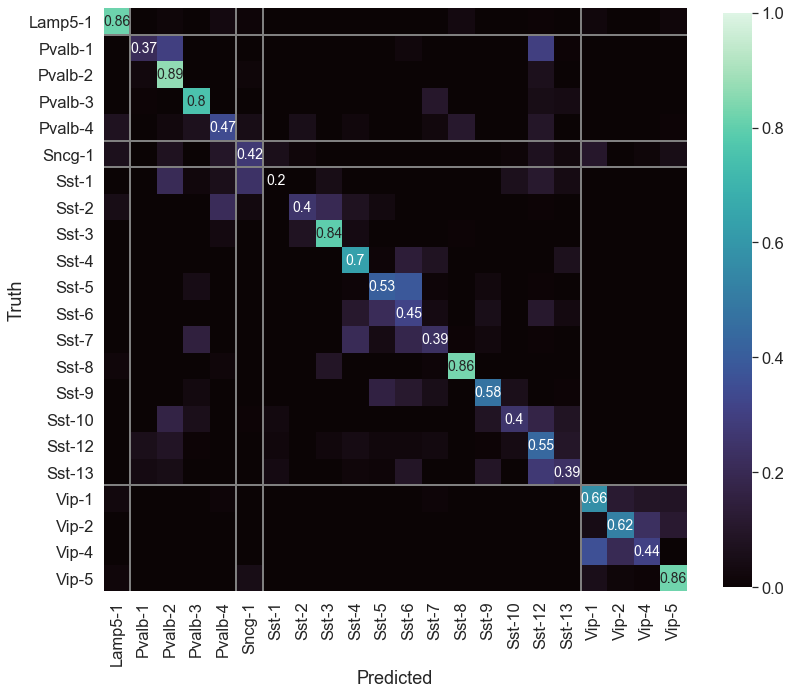

In [3]:
plt.figure(figsize = (12,12))
sns.set(font_scale = 1.5)
off_diag_mask = np.eye(*met_df.shape, dtype=bool)

ax = sns.heatmap(met_df, square = True, yticklabels = True, vmax = 1, cbar_kws = {"shrink":0.73}, cmap = 'mako')
sns.heatmap(met_df, square = True, yticklabels = True, vmax = 1, mask = ~off_diag_mask , cbar = False, cmap = 'mako', annot = True, annot_kws={"size":14}, ax = ax)

ax.hlines([1, 5,6,18], *ax.get_xlim(), color = 'gray', linewidth = 2)
ax.vlines([1, 5,6,18], *ax.get_ylim(), color = 'gray', linewidth = 2)
# ax.hlines(y=10, xmin=0, xmax=10, linewidth=2, color='w', linestyle = '--')
# ax.vlines(x=10, ymin=0, ymax=10, linewidth=2, color='w', linestyle = '--')
# ax.hlines(y=12, xmin=0, xmax=12, linewidth=2, color='w', linestyle = '--')
# ax.vlines(x=12, ymin=0, ymax=12, linewidth=2, color='w', linestyle = '--')
# ax.hlines(y=14, xmin=0, xmax=14, linewidth=2, color='w', linestyle = '--')
# ax.vlines(x=14, ymin=0, ymax=14, linewidth=2, color='w', linestyle = '--')

plt.ylabel("Truth")
plt.xlabel("Predicted")
plt.tight_layout()
plt.savefig('Core_I3_ConfMat_Inhib_MET_CM_tight_diag_mako_2_17.pdf')